# Aufgaben zur Programmierung

Hier benötigte Bibliotheken einbinden.

In [14]:
using CairoMakie
using LinearAlgebra
using Makie.GeometryBasics

## Kontrollstrukturen

### Summe Quadratzahlen

Berechnen Sie den Wert der Summe 

$$
    s = \sum_{n=3}^{30} n^2 = 3^2 + 4^2 + \dots + 30^2
    
$$.

In [20]:
s = 0
for i = 3:30
    s += i^2
end
s

### Fizz buzz

Geben Sie die Zahlen von 1 bis 100 aus. Ändern Sie den Code dann so ab, dass

- jede durch drei teilbare Zahl durch „fizz“,

- jede durch fünf teilbare Zahl durch „buzz“ und 

- jede durch drei und fünf teilbare Zahl durch „fizzbuzz“ 

ersetzt wird. Eine klassische Testfrage bei Einstellungsgesprächen für Programmierer:innen ([Artikel auf Wikipedia](https://de.wikipedia.org/wiki/Fizz_buzz)).

In [21]:
for i = 1:100
    if i % 3 == 0 && i % 5 == 0
        print("fizzbuzz ")
    elseif i % 3 == 0
        print("fizz ")
    elseif i % 5 == 0
        print("buzz ")
    else
        print(i, " ")
    end
end

## Funktionen

### Fakultät einer Zahl

Gesucht ist eine Funktion `factorial`, die für eine ganze Zahl $a$ deren Fakultät $!a = 1 \cdot 2 \cdot \ldots \cdot a$ berechnet.

In [22]:
function factorial(a)
    f = 1
    for i = 1:a
        f *= i
    end
    return f
end

factorial(4)

### Häufigkeit von Buchstaben

Gesucht ist eine Funktion `count_occurences(c, word)` die Zählt, wie oft der Buchstabe `c` im Wort `word` vorkommt. Die Aufgabe soll mithilfe von `for` und `if` gelöst werden.

Schritte: 

1. Beginnen Sie mit einer Funktion die den festen Wert 1 zurückgibt

1. Rufen Sie die Funktion mit einem schönen Wort auf, zum Beispiel `count_occurences('l', "leporello")`

1. Geben Sie in der Funktion die einzelnen Buchstaben aus. Tipp: `for d in word` funktioniert in Julia und Python

1. Jetzt machen Sie sich daran zu zählen

Dieser Ansatz, nämlich mit dem Anwendungsfall zu beginnen und dann zu implementieren, hat in der Softwarewelt einen Namen *Test-driven Development*. 

In [7]:
function count_occurences(c, word)
    n = 0
    for d in word
        if d == c
            n +=1
        end
    end
    return n
end

count_occurences('l', "leporello")

3

### Anagramm

Erstellen Sie eine Funktion `is_anagram(w1, w2)` mit der überprüft wird, ob zwei Worte ein Anagramm bilden (). Falls die beiden Worte ein Anagramm bilden soll die Funktion den Wert wahr zurückgeben, andernfalls falsch.

Testen Sie Ihren Code mit den Beispielen

- hund und katz (falsch)

- termiten und tretmine (wahr)

- ttrmiten und tretmine (falsch)

- weizenbier und zweibeiner (wahr)

- weizen und zweibeiner (falsch)

- anna und annabel (falsch)

Schritte:

1. Erstellen Sie die Funktion so, dass sie immer wahr zurückgibt

1. Geben Sie in derselben Zelle die Ergebnisse für die Beispiele oben aus

1. Ändern Sie die Funktion so, dass die Ergebnisse stimmen. Verwenden Sie hierfür ihre Funktion `count_occurences`

In [11]:
function is_anagram(w1, w2)
    for c in w1
        if count_occurences(c, w1) != count_occurences(c, w2)
            return false
        end
    end
    return length(w1) == length(w2)
end

println(is_anagram("hund", "katz") == false)
println(is_anagram("termiten", "tretmine") == true)
println(is_anagram("weizenbier", "zweibeiner") == true)
println(is_anagram("weizen", "zweibeiner") == false)
println(is_anagram("anna", "annabel") == false)

true
true
true
true
true


### Funktion, die eine Funktion erzeugt (Zusatzaufgabe)

Zusatzaufgabe: Gesucht ist eine Funktion `make_quadratic_function(a, b, c)`, mit der für gegebene Werte $a, b, c$ die quadratische Polynomfunktion $P(x) = a + bx + cx^2$ erzeugt wird. Testen Sie den Code mit den Funktionen

$$  
    P_1(x) = x^2 \quad \text{und} \quad P_2(x) = 1 - 3x + 4x^2.
$$

In [12]:
function make_quadratic_function(a, b, c)
    return x -> a + b * x + c * x^2
end

P1 = make_quadratic_function(0, 0, 1)
P2 = make_quadratic_function(1, -3, 4)

println(P1(2) == 4)
println(P2(2) == 11)

true
true


## Matrizen und Vektoren

### Eingeben und Rechnen

Berechnen Sie für

$$
    \mathbf{K} = \begin{pmatrix} 3 & 2 & 1 \\ 9 & 1 & 3 \end{pmatrix}
    , \quad
    \mathbf{u} = \begin{pmatrix} 2 \\ 2 \\ 2 \end{pmatrix}
    , \quad
    \mathbf{v} = \begin{pmatrix} 2 \\ 1 \\ 7 \end{pmatrix}
    \quad \text{und} \quad
    \mathbf{w} = \begin{pmatrix} 5 \\ 4 \end{pmatrix}
$$

den Vektor

$$
    (\mathbf{u} \cdot \mathbf{v}) \cdot \mathbf{K}\mathbf{u} + \mathbf{w} = \begin{pmatrix} 245 \\ 524 \end{pmatrix}.
$$

In [18]:
K = [3 2 1; 9 1 3]
u = fill(2, 3)
v = [2, 1, 7]
w = [5, 4]

(u ⋅ v) * K * u + w

2-element Vector{Int64}:
 245
 524

## Vektoren und Matrizen zusammensetzen

Erzeugen Sie mithilfe der Vektoren

$$
    \mathbf{x} = \begin{pmatrix} 9 \\ 1 \\ 8\end{pmatrix} 
    \quad \text{und} \quad 
    \mathbf{y} = \begin{pmatrix} 2 \\ 7 \\ 1\end{pmatrix}
$$

die Matrizen

$$
    A = \begin{pmatrix}
        9 & 2 \\
        1 & 7 \\
        8 & 1
    \end{pmatrix}
    , \quad
    B = \begin{pmatrix}
        9 & 1 & 8 \\ 
        2 & 7 & 1
    \end{pmatrix}
    \quad \text{sowie} \quad 
    C = \begin{pmatrix}
        9 & 1 & 8 & 2 & 7 & 1 \\ 
        2 & 7 & 1 & 9 & 1 & 8 \\
        9 & 1 & 8 & 9 & 1 & 8 \\
        2 & 7 & 1 & 2 & 7 & 1
    \end{pmatrix}.
$$

In [21]:
x = [9, 1, 8]
y = [2, 7, 1]

A = hcat(x, y)
B = stack([x, y], dims=1)
C = vcat(hcat(B, stack([y, x], dims=1)), hcat(B, B))

println("A = ", A)
println("B = ", B)
println("C = ", C)

A = [9 2; 1 7; 8 1]
B = [9 1 8; 2 7 1]
C = [9 1 8 2 7 1; 2 7 1 9 1 8; 9 1 8 9 1 8; 2 7 1 2 7 1]


### Zugriff auf Spalten

Geben Sie alle Spalten der Matrix $\mathbf{C}$ aus.

In [22]:
for c = eachcol(C)
    println(c)
end

[9, 2, 9, 2]
[1, 7, 1, 7]
[8, 1, 8, 1]
[2, 9, 9, 2]
[7, 1, 1, 7]
[1, 8, 8, 1]


### Einträge einer Matrix verarbeiten

Berechnen Sie die Summe aller Einträge von $\mathbf{C}$, die größer gleich 2 sind (das Ergebnis ist 104). Die Aufgabe lässt sich auf zwei Arten lösen:

1. Mit `for` und `if`

1. Boolscher Indizierung und der Funktion `sum`

Setzen Sie beide Möglichkeiten um.

In [23]:
s = 0
for i = 1:size(C, 1), j = 1:size(C, 2)
    if C[i, j] >= 2
        s += C[i, j]
    end
end
s

104

In [24]:
sum(C[C.>=2])

104

### Submatrix

Extrahieren Sie aus $\mathbf{C}$ die Matrix

$$
    \mathbf{D} 
    = 
    \begin{pmatrix}
    C_{1,1} & C_{1,3} & C_{1,5} \\
    C_{4,1} & C_{4,3} & C_{4,5} \\
    C_{2,1} & C_{2,3} & C_{2,5} \\
    \end{pmatrix}
    =
    \begin{pmatrix}
    9 & 8 & 7 \\
    2 & 1 & 7 \\
    2 & 1 & 1 \\
    \end{pmatrix}.
$$

In [25]:
D = C[[1, 4, 2], [1, 3, 5]]

D

3×3 Matrix{Int64}:
 9  8  7
 2  1  7
 2  1  1

### Lineares Gleichungssystem

Lösen Sie das lineare Gleichungssystem $\mathbf{D}\mathbf{u} = \mathbf{x}$. Überprüfen Sie die Lösung indem Sie die Norm $|\mathbf{D}\mathbf{x} - \mathbf{u}|$ berechnen.

In [26]:
u = D \ x
norm(D * u - x)

1.0805156823142815e-14

## Plotten

### Funktionen plotten

Plotten Sie die Funktionen 

$$
    f(x) = 1 + \frac{1}{1 + x^2} \cdot \cos(2x)
    \quad \text{und} \quad
    g(x) = \cos(x) \cdot \cos(20x)
$$

für $-2\pi \leq x \leq \pi$

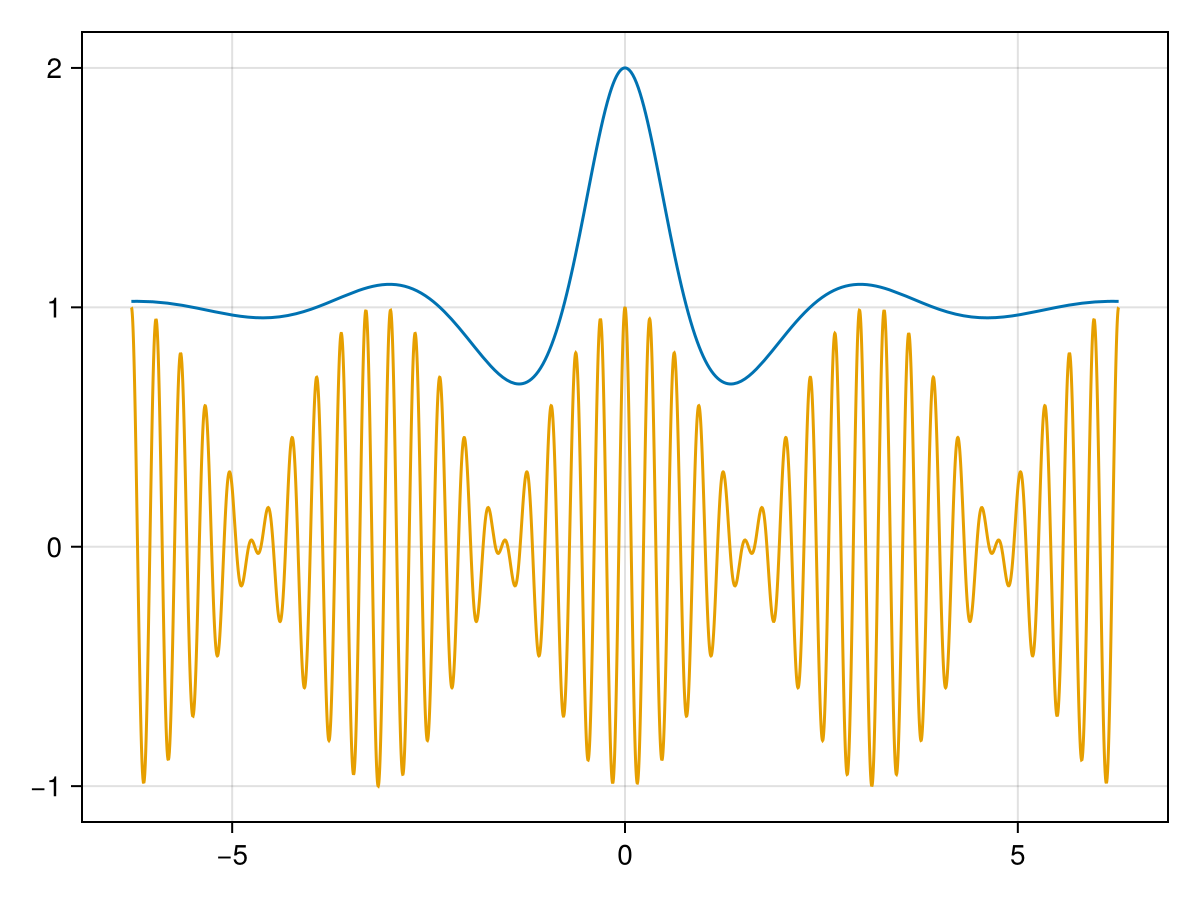

In [27]:
f(x) = 1 + 1 / (1 + x^2) * cos(2x)
g(x) = cos(x) * cos(20x)

p = lines(-2π .. 2π, f)
lines!(-2π .. 2π, g)
p

### Spirograph

Ein Spirograph ist ein Spielzeug mit dem Roulette-Kurven gezeichnet werden können. 

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg width="100%" height="100%" viewBox="0 0 1546 464" version="1.1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:space="preserve" xmlns:serif="http://www.serif.com/" style="fill-rule:evenodd;clip-rule:evenodd;stroke-linejoin:round;stroke-miterlimit:2;">
    <use id="Background" xlink:href="#_Image1" x="0" y="0" width="1546px" height="464px"/>
    <defs>
        <image id="_Image1" width="1546px" height="464px" xlink:href="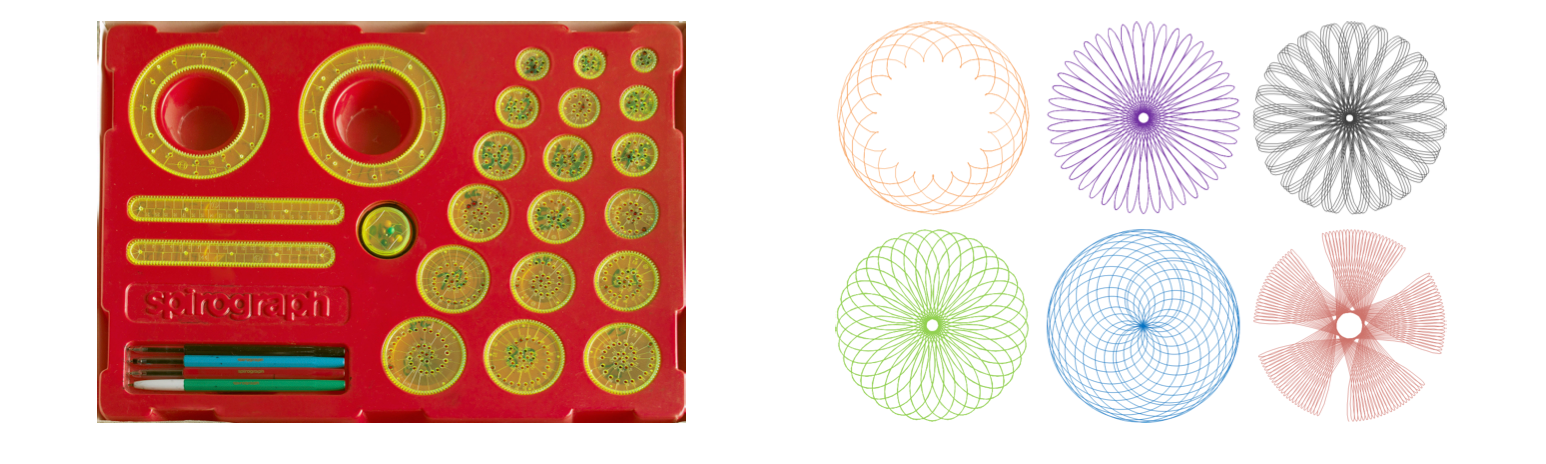"/>
    </defs>
</svg>

Mathematisch werden Roulette-Kurven durch die Abbildung

$$
\mathbf{x}(t)
 = 
\frac{m}{n + m} 
\cdot
\begin{pmatrix}
    \cos(t) \\ 
    \sin(t)
\end{pmatrix} 
- 
a 
\cdot 
\begin{pmatrix} 
             -  \cos(\frac{m}{n} \cdot t) \\ 
    \phantom{-} \sin(\frac{m}{n} \cdot t) 
\end{pmatrix}
$$

beschrieben. 

Eine solche Kurve soll nun für $a = 0.5$, $m = 25$ und $n = 12$ dargestellt werden.

1. Definieren Sie die Variablen `a`, `m` und `n`

1. Darunter kommt die Funktion `spiro(t)`, die für einen Wert von $t$ den Punkt $\mathbf{x}(t)$ berechnet. Sie sollten $\mathbf{x}(\pi) \approx (-1.1586, 0.1294)$ erhalten.

1. Berechnen Sie die Punkte für $0 \leq t \leq n * 2\pi$ an $50 \cdot n \cdot m$ Stellen.

1. Plotten Sie die Kurve.

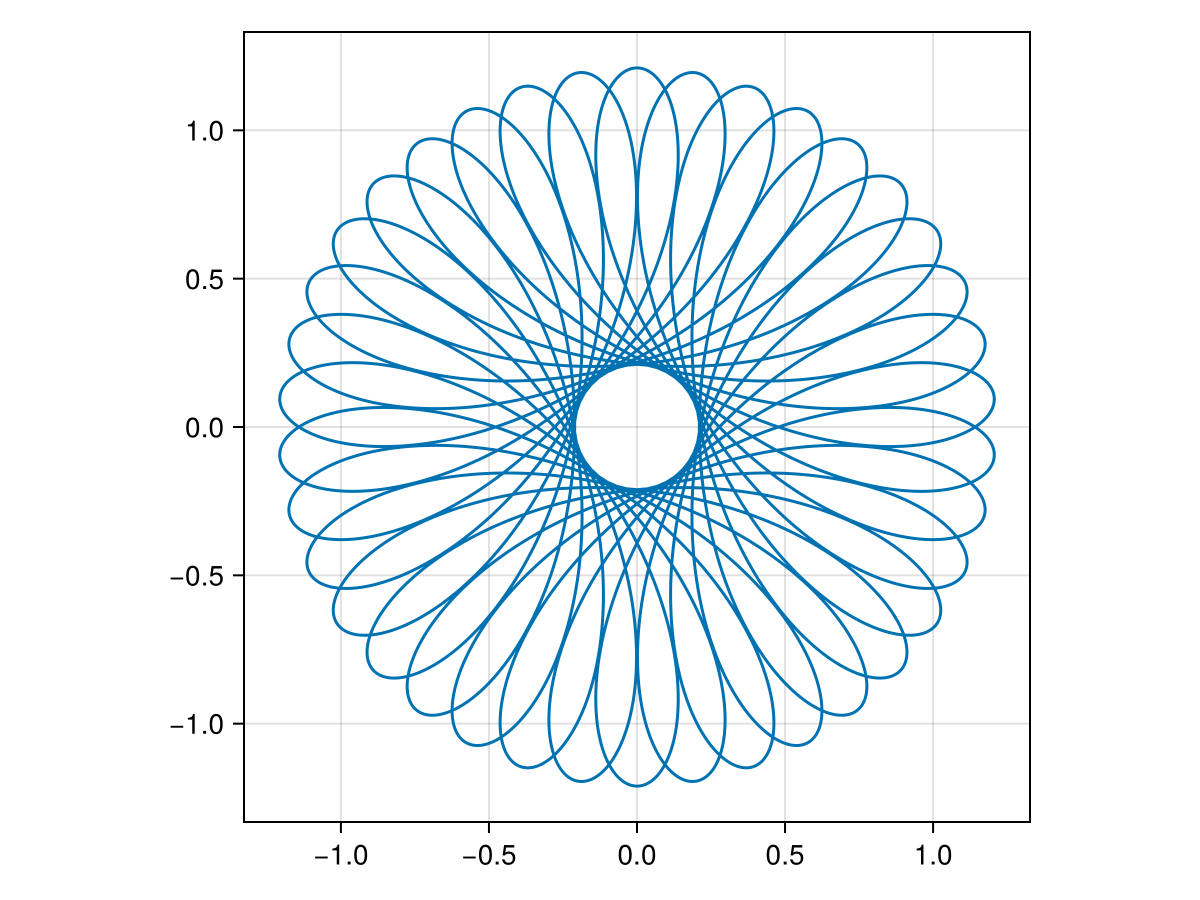

In [28]:
a = 0.5
m = 27
n = 11

function spiro(t)
    return m / (m + n) * [cos(t), sin(t)] + a * [-cos(m / n * t), sin(m / n * t)]
end

pts = stack(spiro.(range(0, n * 2π, 50 * n * m)), dims=2)
p = lines(pts)
p.axis.aspect = DataAspect()
p

### Begrenzung von Punkten

Stellen Sie die Punkte

$$
    (1, 5), \quad (8, -1), \quad (2, 2), \quad (5, 9), \quad (4, 2)
$$

zusammen mit

- einem Rechteck (parallel zu den Koordinatenachsen)

- einem Kreis um den Schwerpunkt der Punkte (Zusatzaufgabe, etwas schwieriger)

die jeweils alle Punkte enthalten dar.

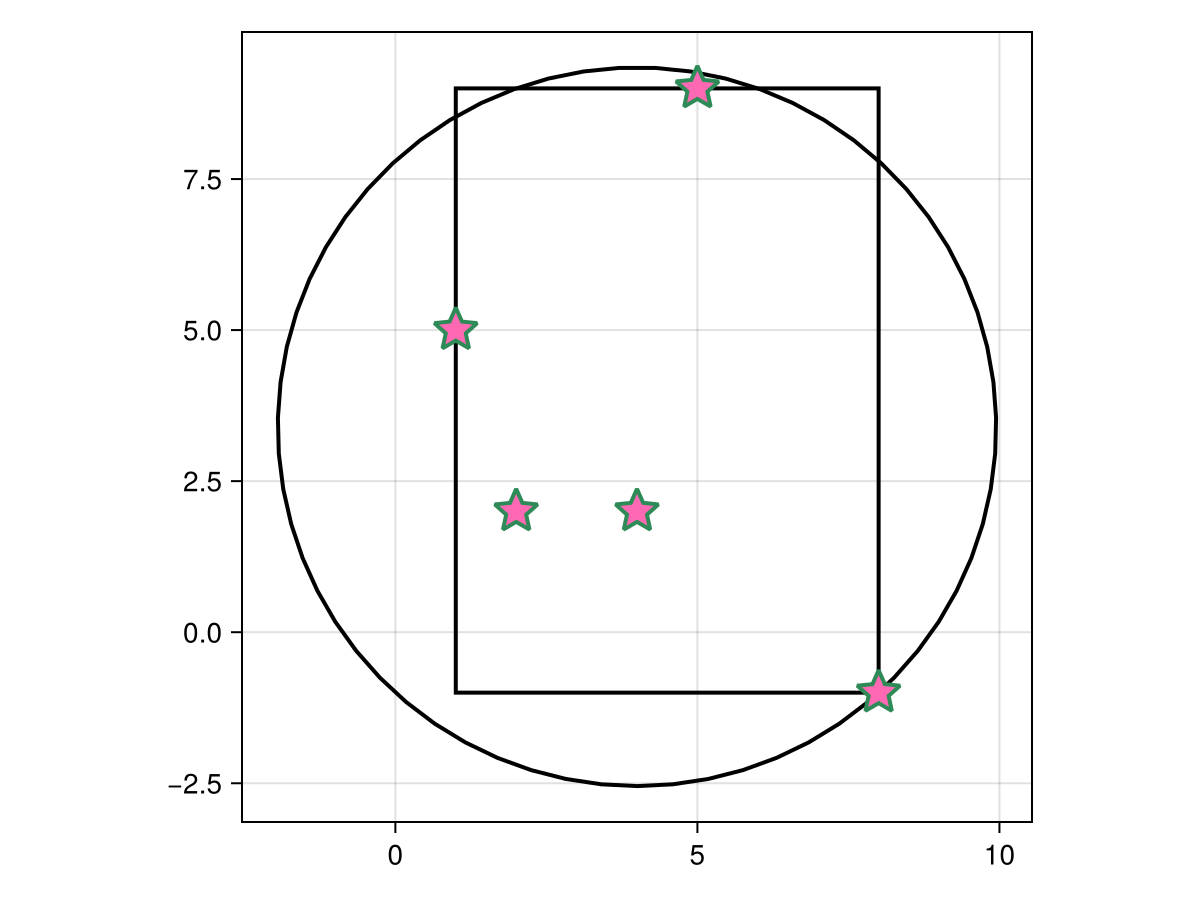

In [30]:
using Makie.GeometryBasics

pts = [
    1 8 2 5 4
    5 -1 2 9 2
]

pmin = minimum(pts, dims=2)
pmax = maximum(pts, dims=2)
sz = pmax - pmin
c = 1 / size(pts, 2) * sum(pts, dims=2)
r = maximum(norm.(eachcol(pts .- c)))

fig = Figure()
ax = Axis(fig[1, 1])
poly!(Rect(pmin[1], pmin[2], sz[1], sz[2]), color=:transparent, strokewidth=2)
poly!(Circle(Point2f(c[1], c[2]), r), color=:transparent, strokewidth=2)
scatter!(pts, marker=:star5, markersize=25, color=:hotpink, strokewidth=2, strokecolor=:seagreen)
ax.aspect = DataAspect()
fig